<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#파일-읽기" data-toc-modified-id="파일-읽기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>파일 읽기</a></span></li><li><span><a href="#토크나이즈" data-toc-modified-id="토크나이즈-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>토크나이즈</a></span></li><li><span><a href="#품사-태깅" data-toc-modified-id="품사-태깅-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>품사 태깅</a></span></li><li><span><a href="#불용어-제거" data-toc-modified-id="불용어-제거-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>불용어 제거</a></span></li><li><span><a href="#빈도수-사전" data-toc-modified-id="빈도수-사전-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>빈도수 사전</a></span></li><li><span><a href="#워드-클라우드" data-toc-modified-id="워드-클라우드-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>워드 클라우드</a></span></li></ul></div>

# **코인_뉴스_원문_20년 3월 4월**

### 파일 읽기

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("news_article_Naver_coin_20_34.csv")
df_data = str(np.array(df['contents'].tolist()))
print(type(df_data))

<class 'str'>


### 토크나이즈

In [2]:
from konlpy.tag import Okt

t = Okt()
tokens = t.morphs(df_data)
print(len(tokens))

84536


### 품사 태깅

In [3]:
print(t.pos(df_data)[:300])

[('["[\'\\\\', 'Punctuation'), ('n', 'Alpha'), ('\\\\', 'Punctuation'), ('n', 'Alpha'), ('\\\\', 'Punctuation'), ('n', 'Alpha'), ('\\\\', 'Punctuation'), ('n', 'Alpha'), ('\\\\', 'Punctuation'), ('n', 'Alpha'), ('©', 'Foreign'), ('정켈', 'Noun'), ('그림', 'Noun'), ('“', 'Foreign'), ('비트코인', 'Noun'), ('으로', 'Josa'), ('돈', 'Noun'), ('벌어', 'Verb'), ('OP', 'Alpha'), ('(', 'Punctuation'), ('오피스텔', 'Noun'), ('성매매', 'Noun'), (')', 'Punctuation'), ('가야', 'Noun'), ('지', 'Josa'), ('.', 'Punctuation'), ('”', 'Foreign'), ('비트코인', 'Noun'), ('열풍', 'Noun'), ('이', 'Josa'), ('한창', 'Noun'), ('이던', 'Josa'), ('때', 'Noun'), ('ㄱ', 'KoreanParticle'), ('의', 'Noun'), ('남성', 'Noun'), ('직장', 'Noun'), ('동료', 'Noun'), ('들', 'Suffix'), ('은', 'Josa'), ('이런', 'Adjective'), ('대화', 'Noun'), ('를', 'Josa'), ('나누며', 'Verb'), ('정답', 'Noun'), ('게', 'Josa'), ('낄낄거렸다', 'Noun'), ('고', 'Josa'), ('한다', 'Verb'), ('.', 'Punctuation'), ('비트코인', 'Noun'), ('이', 'Josa'), ('온라인', 'Noun'), ('메신저', 'Noun'), ('텔레', 'Noun'), ('그램', 'Noun'), ('

In [4]:
my_words = t.nouns(df_data)

print(len(my_words))
print(my_words[:200])

37622
['정켈', '그림', '비트코인', '돈', '오피스텔', '성매매', '가야', '비트코인', '열풍', '한창', '때', '의', '남성', '직장', '동료', '대화', '정답', '낄낄거렸다', '비트코인', '온라인', '메신저', '텔레', '그램', '번방', '의', '주요', '거래', '수단', '사용', '말', '때', '그', '낄낄', '거림', '비트코인', '투자', '모든', '남성', '것', '날로', '발전', '기술', '남성', '착취', '문화', '풍요롭', '데', '기여', '건', '기술', '발전', '디스토피아', '명의', '발전', '인간', '꼭', '일인', '우리', '날로', '발전', '기술', '자격', '사회', '착취', '문화', '인간', '도구', '자본', '기술', '악마', '우리', '머리', '꼭대기', '조종', '낄낄', '거리', '건', '때', '때문', '플랫폼', '본디', '기차', '타고', '곳', '의미', '이', '단어', '사회', '변화', '여러', '의미', '파생', '플랫폼', '디지털', '노인', '장애인', '등', '기술', '소외', '인간', '양산', '다른', '한편', '착취', '구조', '형성', '플랫폼', '노동자', '사회', '노동', '문제', '가장', '극적', '단어', '다른', '한편', '여성', '성적', '착취', '범죄', '수단', '사용', '기도', '남성', '굳이', '성매매', '업소', '노력', '플랫폼', '접속', '클릭', '몇', '번만', '성적', '욕구', '충족', '대상', '자신', '명령', '대로', '노예', '를', '구매', '수', '플랫폼', '단지', '왜곡', '성적', '욕망', '충족', '것', '인간', '양심', '상식', '초월', '인간', '유형', '번방', '사건', '관', '여러', '말', '중', '가장', '충

In [6]:
money = [word for word in my_words if word == '돈']
money_dict = {}
for word in money:
    money_dict[word] = money_dict.get(word, 0) + 1

for key in money_dict:
    print(f'{repr(key)} : {money_dict[key]}')
    print()

'돈' : 87



### 불용어 제거

In [7]:
tokens =  [word for word in my_words if len(word) > 1]
print(tokens[:300])

['정켈', '그림', '비트코인', '오피스텔', '성매매', '가야', '비트코인', '열풍', '한창', '남성', '직장', '동료', '대화', '정답', '낄낄거렸다', '비트코인', '온라인', '메신저', '텔레', '그램', '번방', '주요', '거래', '수단', '사용', '낄낄', '거림', '비트코인', '투자', '모든', '남성', '날로', '발전', '기술', '남성', '착취', '문화', '풍요롭', '기여', '기술', '발전', '디스토피아', '명의', '발전', '인간', '일인', '우리', '날로', '발전', '기술', '자격', '사회', '착취', '문화', '인간', '도구', '자본', '기술', '악마', '우리', '머리', '꼭대기', '조종', '낄낄', '거리', '때문', '플랫폼', '본디', '기차', '타고', '의미', '단어', '사회', '변화', '여러', '의미', '파생', '플랫폼', '디지털', '노인', '장애인', '기술', '소외', '인간', '양산', '다른', '한편', '착취', '구조', '형성', '플랫폼', '노동자', '사회', '노동', '문제', '가장', '극적', '단어', '다른', '한편', '여성', '성적', '착취', '범죄', '수단', '사용', '기도', '남성', '굳이', '성매매', '업소', '노력', '플랫폼', '접속', '클릭', '번만', '성적', '욕구', '충족', '대상', '자신', '명령', '대로', '노예', '구매', '플랫폼', '단지', '왜곡', '성적', '욕망', '충족', '인간', '양심', '상식', '초월', '인간', '유형', '번방', '사건', '여러', '가장', '충격', '반응', '이용', '남성', '범죄', '성인', '콘텐츠', '이용', '시청', '잘못', '자기', '영상', '음란', '영상', '피해자', '피해자', '자신', '범죄자', '취급', '피해',

In [11]:
stop_words = ['가장', '때문', '통해', '대해', '위해', '관련', '정도', '지금', '최근',
             '다른', '지금', '라며', '하나', '지난', '이상', '사진', '우리', '사실',
             '경우', '크게', '오후', '하루', '이후', '올해', '확인', '결과', '모두',
             '하우스', '이번', '현재', '이유', '사례', '심사', '진행', '특급', '여러',
             '위원', '가지', '자신', '보고', '회장', '명칭', '채널', '지원', '진자',
             '업자', '정말', '계속', '자영', '대한', '이제', '두기', '공동', '조씨',
             '한편', '이용', '시작', '직접', '실제', '그램', '황현희', '지난해', 
             '부분', '노예', '제공', '번방', '텔레', '진행자', '신천지', '오늘', '최주',
             '비대', '적용', '장원', '문제', '저희', '신유진', '트로트', '얘기', '협조',
             '경찰', '착취', '범죄', '피해자', '음란물', '청소년', '금지', '노래방', '박사',
             '여성', '편의점', '처벌', '운영', '사건', '아동', '고담', '압수수색', '마이크',
             '김현정', '영상', '설명', '한세상', '배포', '다시', '고의', '퍼스트', '세대',
             '연산', '남성', '대화방', '검찰', '인천', '부산', '말씀', '수사', '확보', '취재',
             '오피스텔', '서울', '당시', '피해', '입소', '모습', '상가', '그것', '사태', '기준',
             '집단', '보도', '요즘', '공사', '기부', '회원', '성범죄', '추적', '지역',
             '처음', '마음', '디지털', '이야기', '강제', '사람', '아이', '기사', '상황',
             '활동', '보기', '자체', '기자']


my_words = [word for word in tokens if word not in stop_words]

### 빈도수 사전

In [12]:
article_dict = {}

for word in my_words:
    article_dict[word] = article_dict.get(word, 0) + 1

article_dict['돈'] = 462
sorted_dict = sorted(article_dict, key=article_dict.get, reverse=True)

for key in sorted_dict[:100]:
    print(f'{repr(key)} : {article_dict[key]}')
    print()

'돈' : 462

'코로나' : 192

'생각' : 142

'마스크' : 114

'대학생' : 99

'투자' : 94

'뉴스' : 90

'서비스' : 84

'코인' : 79

'사회' : 73

'감염' : 67

'주식' : 66

'시설' : 59

'공유' : 59

'화폐' : 57

'온라인' : 56

'개인' : 56

'주거' : 56

'정상근' : 56

'투자자' : 55

'단체' : 51

'자료' : 50

'봉사활동' : 47

'구독' : 46

'분석' : 45

'시간' : 45

'한국' : 41

'강의' : 41

'주택' : 40

'생활' : 40

'거리' : 39

'정보' : 39

'관리' : 39

'방역' : 39

'친구' : 38

'전자' : 38

'시장' : 37

'권영철' : 37

'무단' : 36

'우려' : 36

'아파트' : 36

'경제' : 36

'대화' : 35

'계획' : 35

'병원' : 35

'학교' : 34

'암호' : 34

'조사' : 34

'공급' : 34

'청년' : 34

'교수' : 34

'위험' : 33

'가구' : 33

'사업' : 33

'비트코인' : 32

'구매' : 32

'직원' : 32

'기업' : 32

'참여' : 32

'센터' : 32

'삼성' : 31

'일부' : 31

'행복' : 31

'수익' : 31

'분양' : 31

'기술' : 30

'공개' : 30

'접촉' : 30

'환불' : 30

'커뮤니티' : 29

'전국' : 29

'제대로' : 29

'거부' : 29

'한겨레' : 29

'가상' : 29

'연산역' : 29

'명의' : 28

'단지' : 28

'방문' : 28

'대학' : 28

'오히려' : 28

'확진' : 28

'임대주택' : 28

'신상' : 28

'사이트' : 28

'유포' : 28

'일단' : 28

'광주' : 28

'리미' : 

### 워드 클라우드

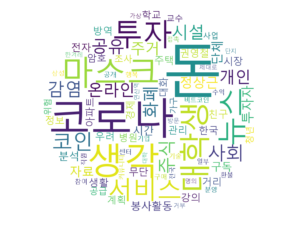

In [13]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud
from PIL import Image

font_path = 'c:/Windows/Fonts/malgun.ttf'
image = np.array(Image.open('circle.png'))

wc = WordCloud(
    font_path = font_path,
    width = 800,
    height = 400,
    mask = image,
    background_color = 'white',
    max_words = 80)

wc.generate_from_frequencies(article_dict)

wc.to_file('article_coin_20_34.png')

plt.figure()
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()